# Customer Personality Analysis
https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

## Importing the Libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from matplotlib.colors import ListedColormap

### Overriding the default filter

In [39]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Loading the dataset

In [40]:
data = pd.read_csv("./input/marketing_campaign.csv", sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Cleaning

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

1. There are missing values in Income <font color='red'>(Non-Null Count only has 2216 not 2240)</font>
   
2. Still have categorical features in the data <font color='red'>(the Dtype is object)</font>, so we need to transform it into numeric type

### Drop rows which contain missing values

In [42]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

### Reset index of the dataset (<font color='red'>from 0 ~ 2215</font>)

In [43]:
data = data.reset_index(drop=True)
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2212,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2213,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2214,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### Convert Dt_Customer to datetime format

In [44]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


### Find the maximum of enrollment date in the data for calculation

In [45]:
latest_date = max(date for date in data["Dt_Customer"])
print(latest_date.year)

2014


### Create "Age" feature of customers from the "Year_Birth" to the latest date in the data

In [46]:
data["Age"] = latest_date.year - data["Year_Birth"]

### Create "Spending" feature from customers' total spent on merchandices

In [47]:
data["Spending"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

### Transform values in "Marital_Status" into "Couple" or "Alone"

In [48]:
data["Marital_Status"] = data["Marital_Status"].replace({"Married":"Couple", "Together":"Couple", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

### Create "Children" feature indicating total children in the family

In [49]:
data["Children"] = data["Kidhome"] + data["Teenhome"]

### Create "Family_Size" feature indecating total members in the family

In [50]:
data["Family_Size"] = data["Marital_Status"].replace({"Alone": 1, "Couple":2})+ data["Children"]

### Create "Has_Child" feature indicating if there are children in the family

In [51]:
data["Has_Child"] = np.where(data.Children > 0, 1, 0)

### Create "Seniority" feature indicating the months after customers enrolled to latest date

In [52]:
data["Seniority"] = pd.to_numeric(data["Dt_Customer"].apply(lambda x: (latest_date - x)).dt.days, downcast="integer") / 30

### Create "Campaign" feature indicating the total campaign accepted by customers

In [53]:
data['Campaign'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

### Simplify edecation levels

In [54]:
data["Education"] = data["Education"].replace({"Basic":"Undergraduate", "2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

### Clarify the name of merchandices

In [55]:
data = data.rename(columns={"MntWines": "Wines", "MntFruits":"Fruits", "MntMeatProducts":"Meat", "MntFishProducts":"Fish", "MntSweetProducts":"Sweets", "MntGoldProds":"Gold"})

In [56]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Spending', 'Children', 'Family_Size', 'Has_Child', 'Seniority',
       'Campaign'],
      dtype='object')

### Take the features we need

In [57]:
data = data[["Education", "Income", "Recency", "Wines", "Fruits",
             "Meat", "Fish", "Sweets", "Gold", "Age", "Spending", 
             "Marital_Status", "Children", "Family_Size", 
             "Has_Child", "Seniority", "Campaign",
             "NumDealsPurchases", "NumWebPurchases",
             "NumCatalogPurchases", "NumStorePurchases"]]
data.describe()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Age,Spending,Children,Family_Size,Has_Child,Seniority,Campaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,45.179603,607.075361,0.947202,2.592509,0.714350,17.066877,0.448556,2.323556,4.085289,2.671029,5.800993
std,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,11.985554,602.900476,0.749062,0.905722,0.451825,7.748968,0.892440,1.923716,2.740951,2.926734,3.250785
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,37.000000,69.000000,0.000000,2.000000,0.000000,11.333333,0.000000,1.000000,2.000000,0.000000,3.000000
50%,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,44.000000,396.500000,1.000000,3.000000,1.000000,17.100000,0.000000,2.000000,4.000000,2.000000,5.000000
75%,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,55.000000,1048.000000,1.000000,3.000000,1.000000,22.866667,1.000000,3.000000,6.000000,4.000000,8.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,121.000000,2525.000000,3.000000,5.000000,1.000000,35.433333,5.000000,15.000000,27.000000,28.000000,13.000000


As we can see, there are outliers in <font color='red'>Income and Age</font>

### Plot broader view of the data with some of the seleted features

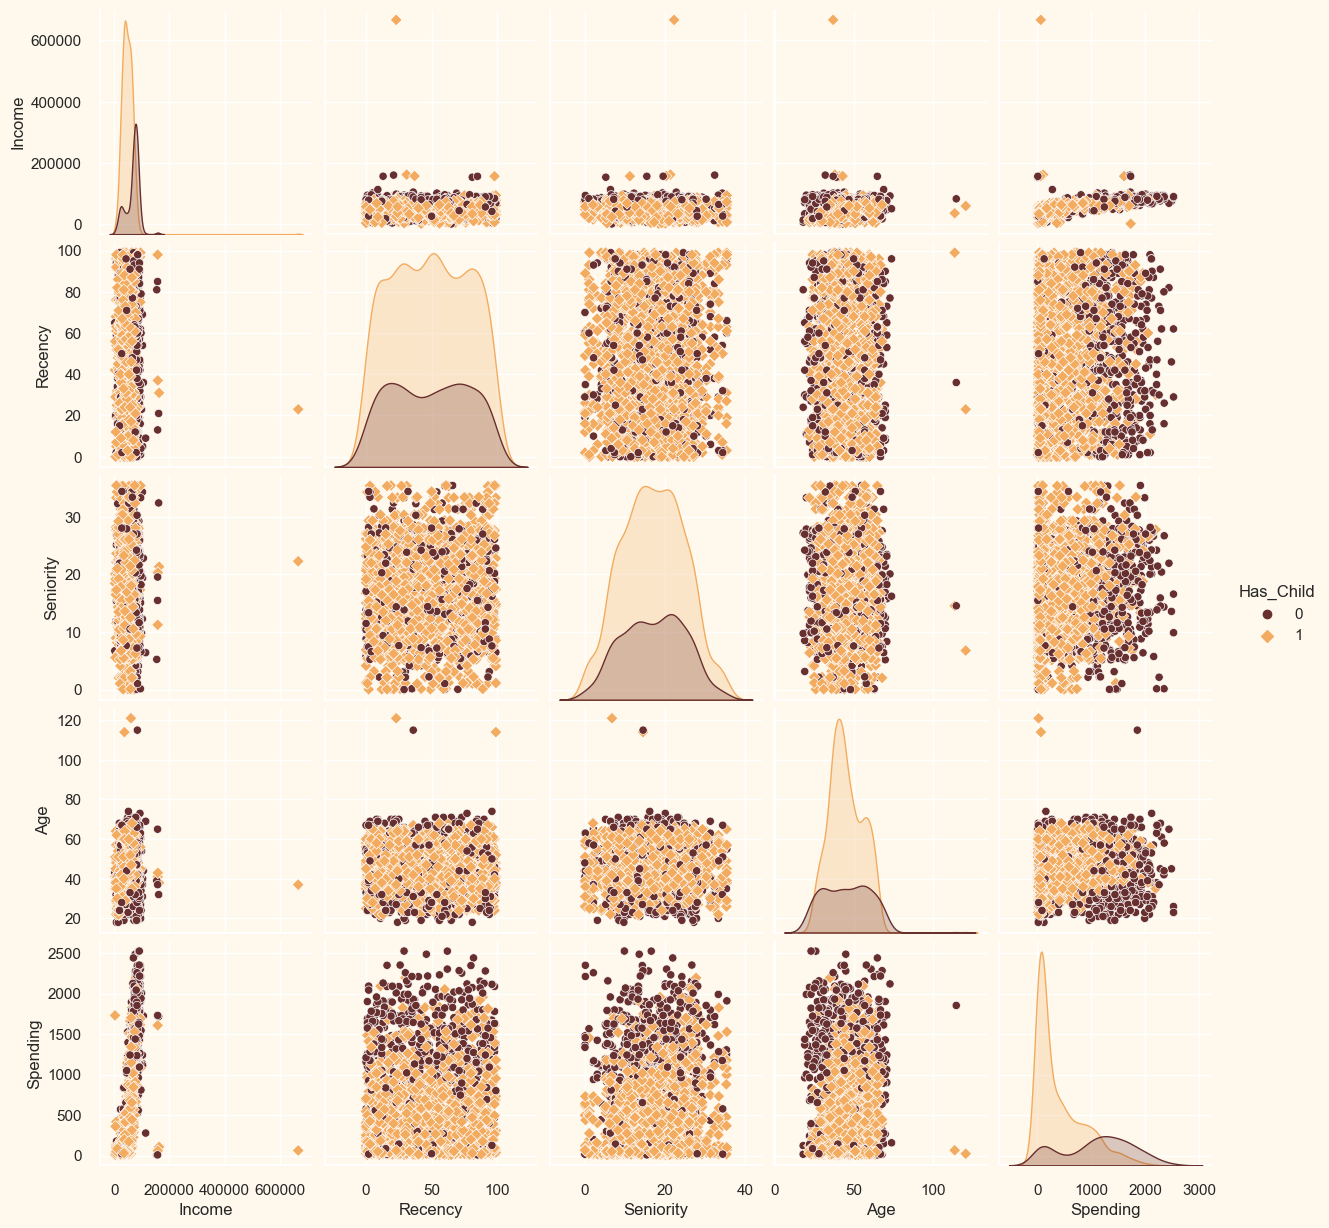

In [58]:
sns.set_theme(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})

To_Plot = [ "Income", "Recency", "Seniority", "Age", "Spending", "Has_Child"]
sns.pairplot(data[To_Plot], hue= "Has_Child", palette= (["#682F2F","#F3AB60"]), markers=["o","D"])

plt.show()

### Drop the outlier data

In [59]:
data = data[(data["Age"] < 90)]
data = data[(data["Income"] < 600000)]

data.describe()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Age,Spending,Children,Family_Size,Has_Child,Seniority,Campaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,51958.810579,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,45.086347,607.268083,0.947559,2.593128,0.714286,17.071474,0.448915,2.324593,4.088156,2.672242,5.806510
std,21527.278844,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,11.701599,602.513364,0.749466,0.906236,0.451856,7.751716,0.893017,1.924507,2.742187,2.927542,3.250939
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35233.500000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,37.000000,69.000000,0.000000,2.000000,0.000000,11.333333,0.000000,1.000000,2.000000,0.000000,3.000000
50%,51371.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,44.000000,397.000000,1.000000,3.000000,1.000000,17.100000,0.000000,2.000000,4.000000,2.000000,5.000000
75%,68487.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,55.000000,1048.000000,1.000000,3.000000,1.000000,22.866667,1.000000,3.000000,6.000000,4.000000,8.000000
max,162397.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,74.000000,2525.000000,3.000000,5.000000,1.000000,35.433333,5.000000,15.000000,27.000000,28.000000,13.000000


The data is clean now

## Data Preprocessing

### Lable Encoding (<font color='red'>transform categorical feature into numerical feature</font>)

In [60]:
object_cols = [col for col in data.columns if data[col].dtypes == "object"]
LE = LabelEncoder()
data[object_cols] = data[object_cols].apply(LE.fit_transform)

data

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Age,...,Marital_Status,Children,Family_Size,Has_Child,Seniority,Campaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,0,58138.0,58,635,88,546,172,88,88,57,...,0,0,1,0,32.366667,1,3,8,10,4
1,0,46344.0,38,11,1,6,2,1,6,60,...,0,2,3,1,4.166667,0,2,1,1,2
2,0,71613.0,26,426,49,127,111,21,42,49,...,1,0,2,0,15.733333,0,1,8,2,10
3,0,26646.0,26,11,4,20,10,3,5,30,...,1,1,3,1,2.166667,0,2,2,0,4
4,1,58293.0,94,173,43,118,46,27,15,33,...,1,1,3,1,10.700000,0,5,5,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0,61223.0,46,709,43,182,42,118,247,47,...,1,1,3,1,18.033333,0,2,9,3,4
2212,1,64014.0,56,406,0,30,0,0,8,68,...,1,3,5,1,2.033333,1,7,8,2,5
2213,0,56981.0,91,908,48,217,32,12,24,33,...,0,0,1,0,10.500000,1,1,2,3,13
2214,1,69245.0,8,428,30,214,80,30,61,58,...,1,1,3,1,10.533333,0,2,6,5,10


### Standardize data (<font color='red'>StandardScaler</font>)

In [61]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

scaled_data.head()

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Age,...,Marital_Status,Children,Family_Size,Has_Child,Seniority,Campaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,-0.893586,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,1.018352,...,-1.349603,-1.264598,-1.758359,-1.581139,1.973583,0.617244,0.351030,1.426865,2.503607,-0.555814
1,-0.893586,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,1.274785,...,-1.349603,1.404572,0.449070,0.632456,-1.665144,-0.502808,-0.168701,-1.126420,-0.571340,-1.171160
2,-0.893586,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,0.334530,...,0.740959,-1.264598,-0.654644,-1.581139,-0.172664,-0.502808,-0.688432,1.426865,-0.229679,1.290224
3,-0.893586,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-1.289547,...,0.740959,0.069987,0.449070,0.632456,-1.923210,-0.502808,-0.168701,-0.761665,-0.913000,-0.555814
4,0.571657,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,-1.033114,...,0.740959,0.069987,0.449070,0.632456,-0.822130,-0.502808,1.390492,0.332600,0.111982,0.059532


## Dimensionality Reduction

### Principal Component Analysis (<font color='red'>PCA</font>)

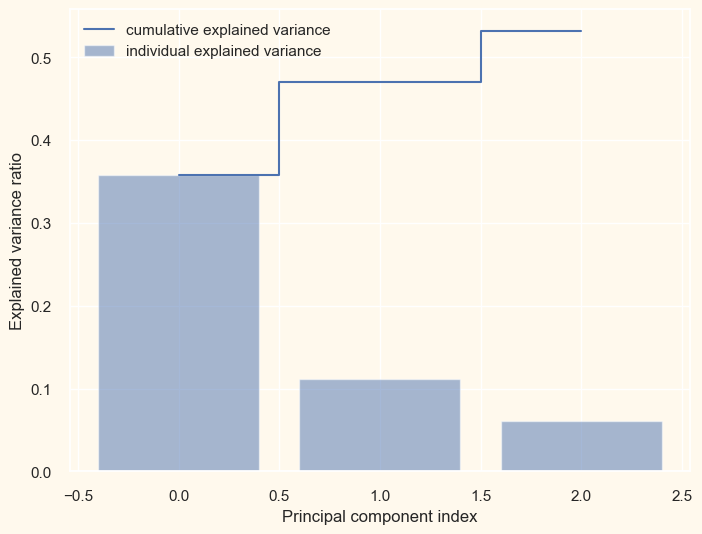

In [62]:
fig, ax = plt.subplots(figsize=(8,6))

pca = PCA(n_components=3)
scaled_data = pca.fit_transform(scaled_data)
PCA_ds = pd.DataFrame(scaled_data, columns=(["col1","col2", "col3"]))

var_ratio = pca.explained_variance_ratio_
cum_var_ratio = np.cumsum(var_ratio)

ax.bar(range(0, len(var_ratio)), var_ratio, alpha=0.5, label="individual explained variance")
ax.step(range(0, len(cum_var_ratio)), cum_var_ratio, where="mid", label="cumulative explained variance")

ax.set(ylabel="Explained variance ratio", xlabel="Principal component index")
ax.legend()

plt.show() 

### 3D Projection Of Data in the reduced dimension

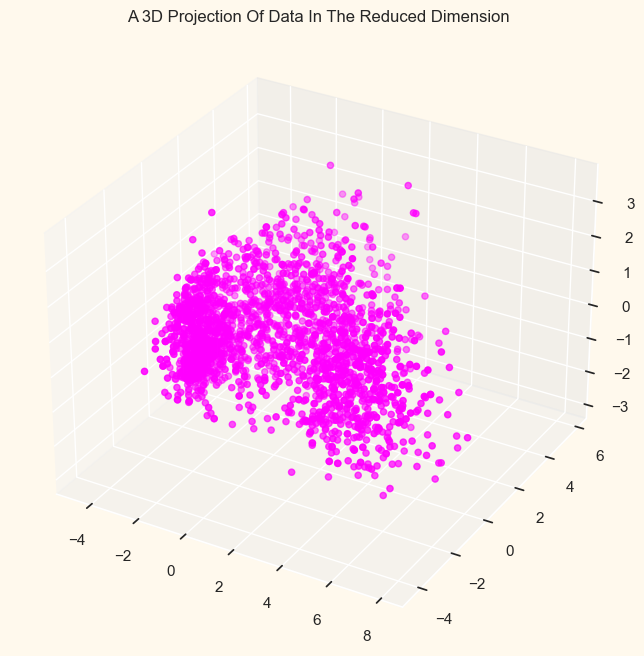

In [63]:
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="magenta", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Clustering

### Elbow Method (<font color='red'>SSE - Sum of Squared Errors</font>)

<img src="https://imgur.com/Y4tc8X8.png" style="width:20%">

其中總共有 K 個群， C<sub>i</sub> 代表其中一個群，m<sub>i</sub> 表示該群的中心點。<br>
計算每群中，每個點到群中心的距離平方和，再算出總和。

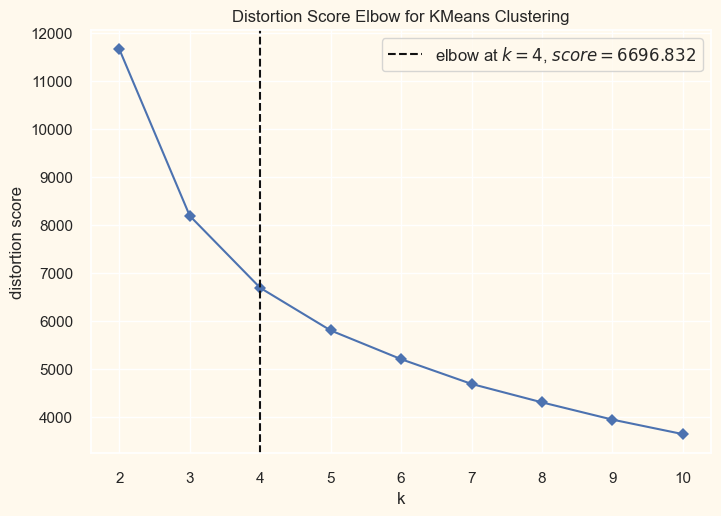

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
Elbow_M = KElbowVisualizer(KMeans(), k=10, timings=False)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

It is not really clear what should be the Elbow point.

### Silhouette Score (<font color='red'>Silhouette Coefficient</font>)

<img src="https://imgur.com/4WX8Vae.png" style="width:20%"></img>

b為不同群之間的點平均距離，a為同群之間的距離，S則越大越好，代表分得越清楚。<br>
主要是要找出<b><font color='red'>同群資料點內最近且不同群越分散</font></b>的K值。

<a href="https://www.baeldung.com/cs/silhouette-values-clustering">如果你想知道背後詳細的算式過程可以看這個</a>


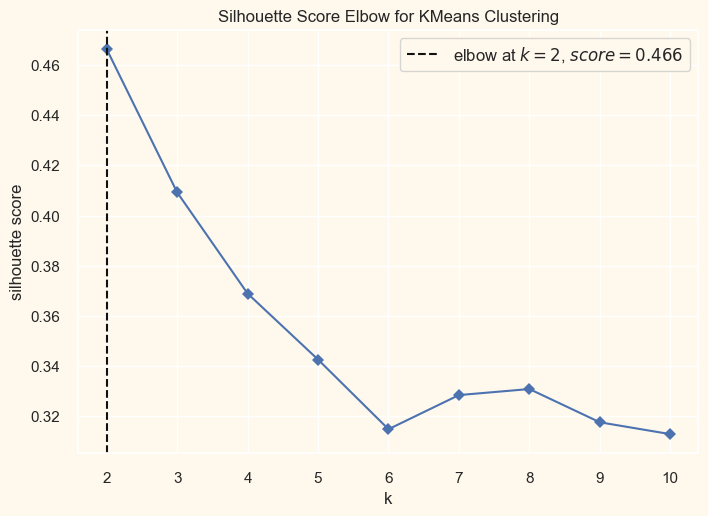

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [65]:
Elbow_M = KElbowVisualizer(KMeans(), metric="silhouette", k=10, timings=False)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

### Silhouette Plot

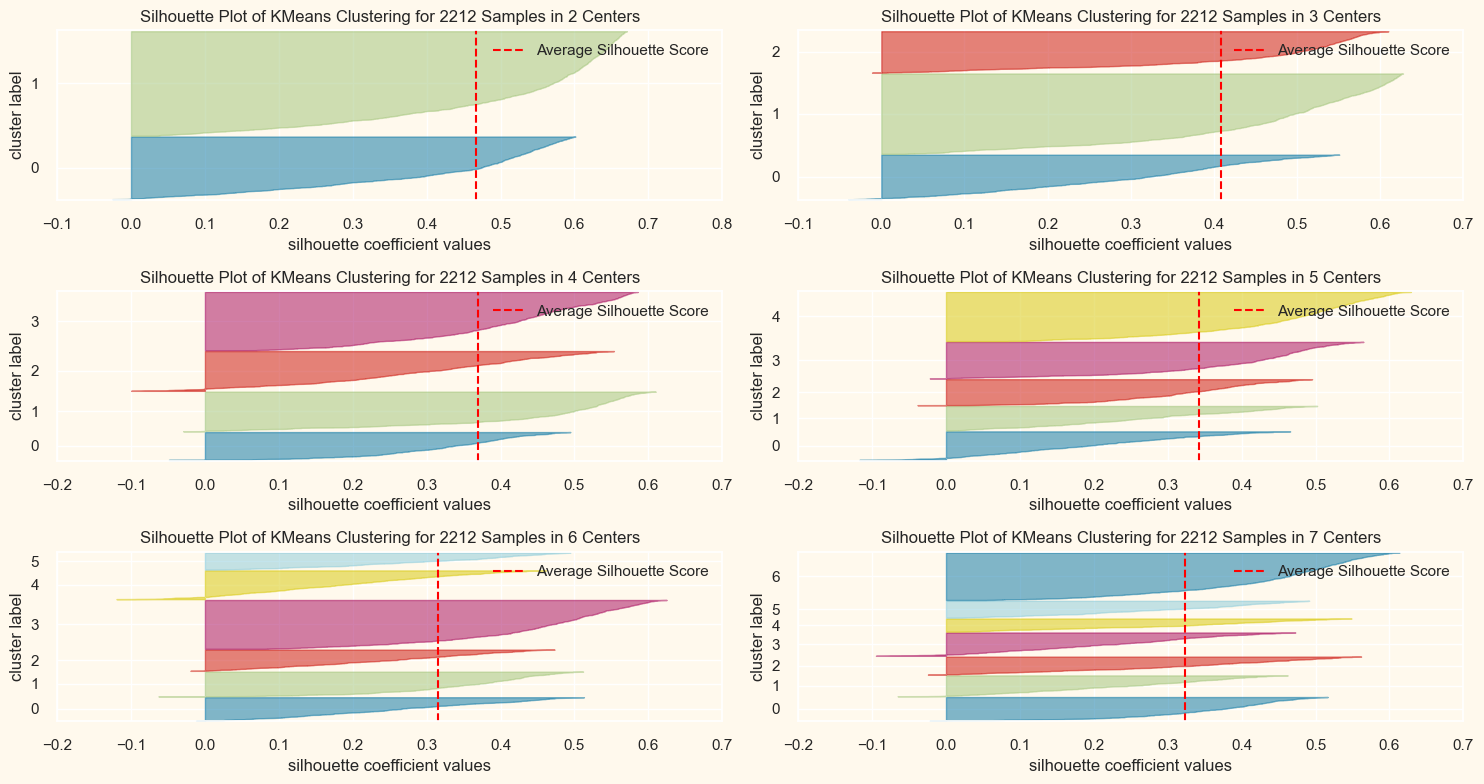

In [66]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
k_means_range = range(2, 8)

for i in k_means_range:
    row, col = divmod(i, 2)
    silhouette_visualizer(KMeans(i, random_state=42), PCA_ds, ax=ax[row-1][col], colors="yellowbrick", show=False)

fig.tight_layout()

1. All the clusters should have a Silhouette Score more than the average score of the dataset
2. There should not be wide fluctuations in the size of the clusters.
3. The Silhouette Score higher than 0.7 will have strong performance, between 0.5 to 0.7 is reasonable, lower than 0.5 may not be suitable for it.

#### In this case, <font color='red'>k = 4 </font>may have the optimal value.

### Agglomerative Hierarchical Clustering Model (<font color='red'>聚合式階層分群法</font>)
<a href="https://pyecontech.com/2020/06/12/hierarchical_clustering/">簡單的介紹1</a>
<a href="http://mirlab.org/jang/books/dcpr/dcHierClustering.asp?title=3-2%20Hierarchical%20Clustering%20(%B6%A5%BCh%A6%A1%A4%C0%B8s%AAk)&language=chinese">簡單的介紹2</a>

一開始我們將每一筆資料視為一個群聚（cluster），假設我們現在擁有n筆資料，則將這n筆資料視為n個群聚，亦即每個群聚包含一筆資料：

1. 將每筆資料視為一個群聚 C<sub>i</sub>, i=1 1 to n.
2. 找出所有群聚間，距離最接近的兩個群聚 C<sub>i</sub>、C<sub>j</sub>
3. 合併 C<sub>i</sub>、 C<sub>j</sub> 成為一個新的群聚
4. 假如目前的群聚數目多於我們預期的群聚數目，則反覆重複步驟二至四，直到群聚數目已將降到我們所要求的數目。

In [67]:
AC = AgglomerativeClustering(n_clusters=4)

yhat_AC = AC.fit_predict(PCA_ds)

PCA_ds["Clusters"] = yhat_AC
data["Clusters"]= yhat_AC

### Plotting the Cluster

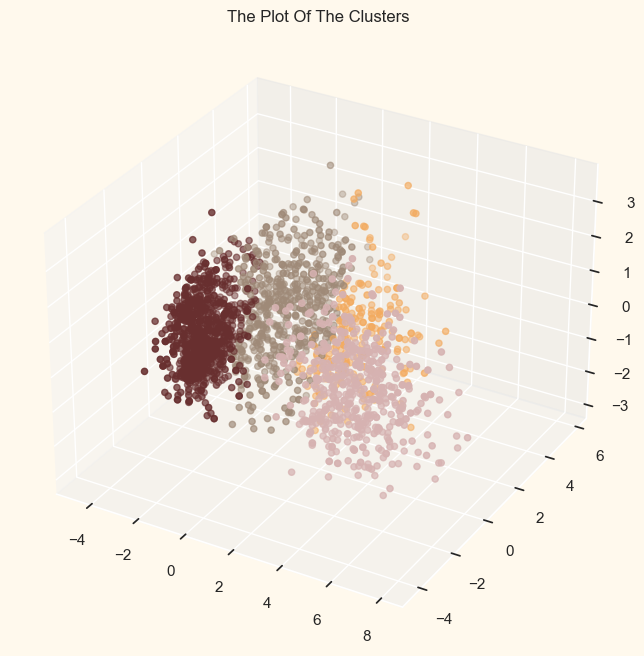

In [68]:
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d')
cmap = ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

ax.scatter(x, y, z, c=PCA_ds["Clusters"], marker='o', cmap=cmap)
ax.set_title("The Plot Of The Clusters")

plt.show()

## Evaluation

### Group Distribution of Clustring

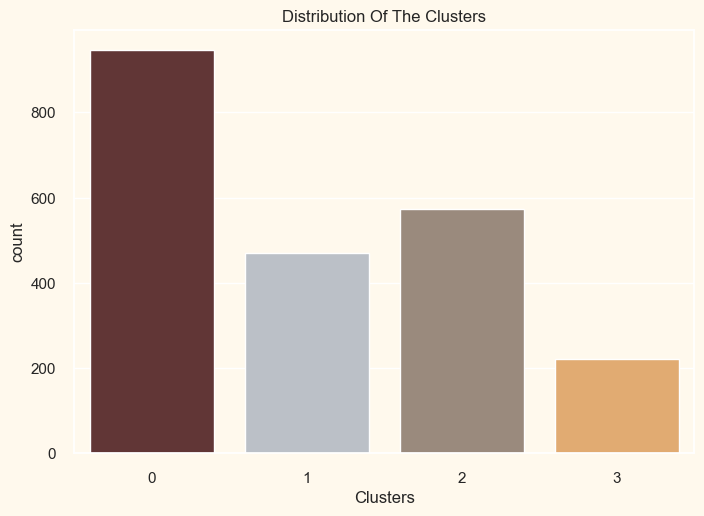

In [69]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
sns.countplot(x=data["Clusters"], palette=pal).set_title("Distribution Of The Clusters")

plt.show()

### The Pattern of "Spending" and "Income"

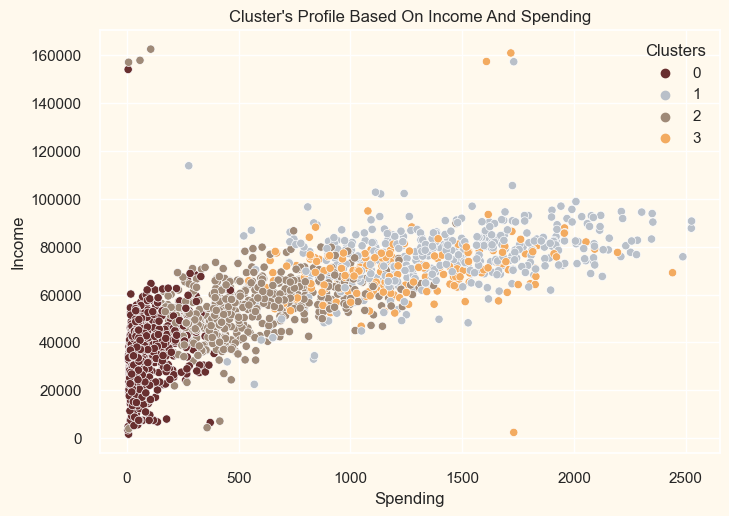

In [70]:
sns.scatterplot(data=data, x="Spending", y="Income", hue="Clusters", palette=pal)
plt.title("Cluster's Profile Based On Income And Spending")

plt.show()

* group 0: high spending & average income
* group 1: high spending & high income
* group 2: low spending & low income
* group 3: low spending & average income

### Detailed Distribution of "Spending"

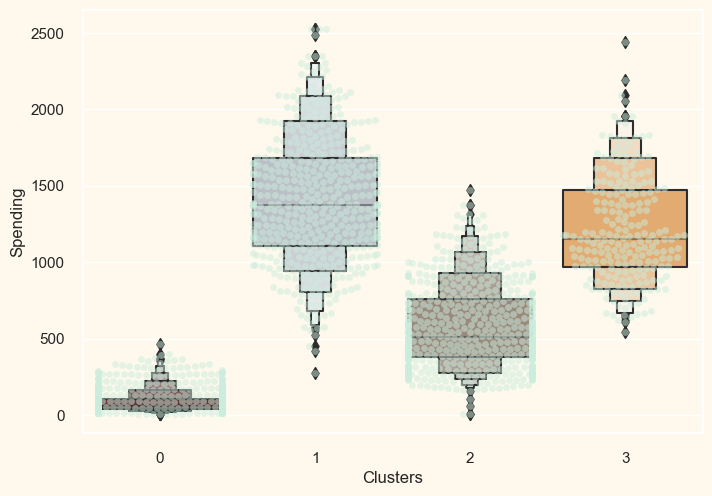

In [71]:
sns.swarmplot(data=data, x="Clusters", y="Spending", color= "#CBEDDD", alpha=0.5)
sns.boxenplot(data=data, x="Clusters", y="Spending", palette=pal)

plt.show()

Cluster 1 has the biggest spending customers set, followed by the cluster 0, 2 then 3.

### The Distribution of Merchaidices

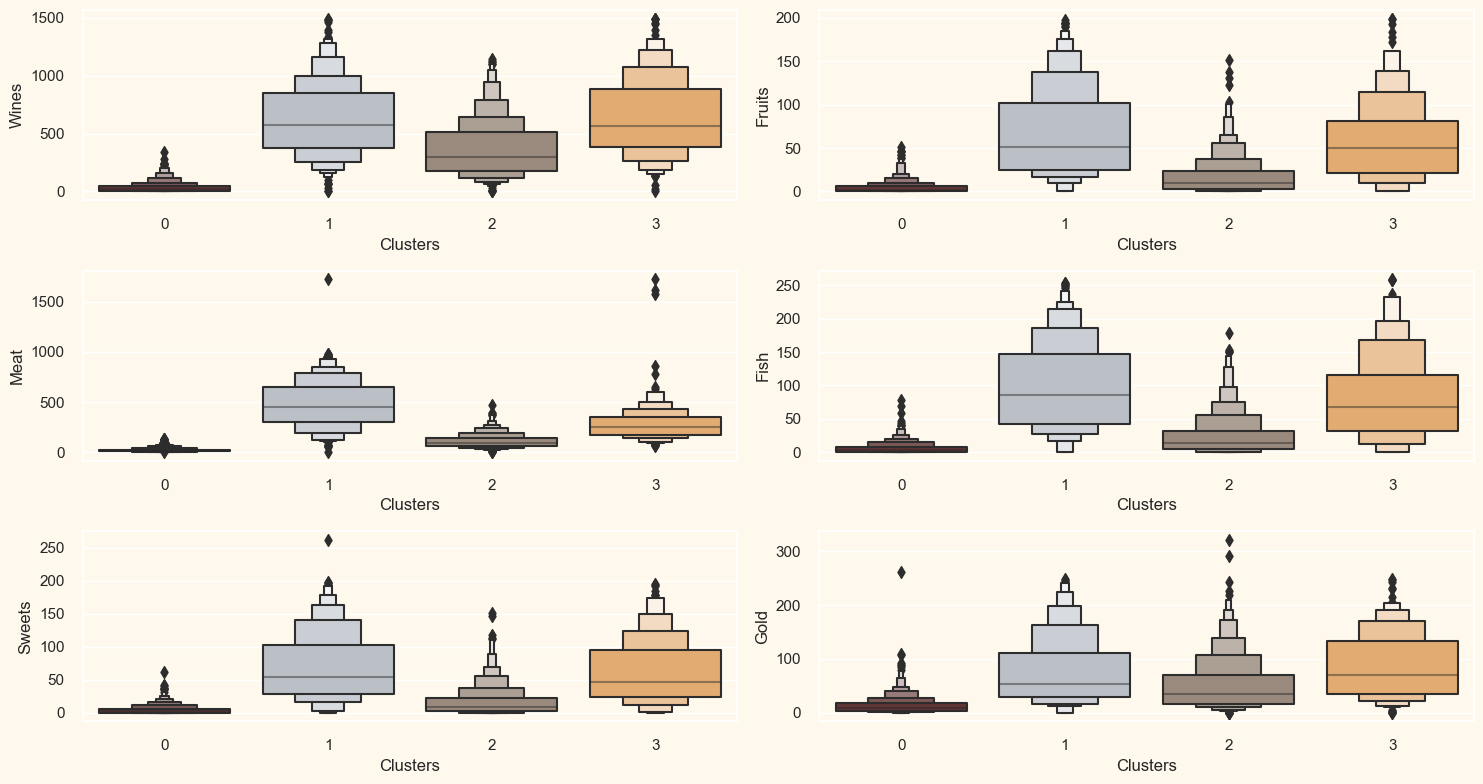

In [72]:
merchaindices = ["Wines", "Fruits", "Meat", "Fish", "Sweets", "Gold"]
fig, ax = plt.subplots(3, 2, figsize=(15,8))

for i, v in enumerate(merchaindices):
    row, col = divmod(i, 2)
    sns.boxenplot(data=data, x="Clusters", y=v, ax=ax[row][col], palette=pal)

plt.tight_layout()
plt.show()

1. Cluster 1 has the highest spending on each merchaindices than other clusters
2. Cluster 0 got second place of all the merchaindices, and they spent more on luxurious goods than other merchaindices. 

### Sum of Accepted Promotions

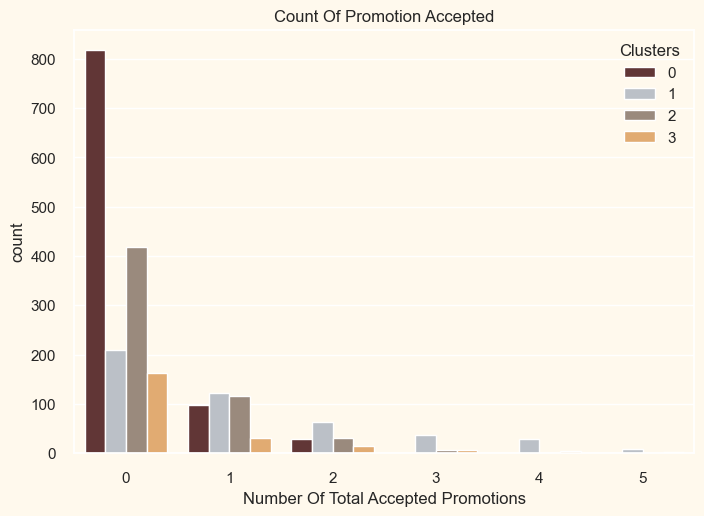

In [73]:
pl = sns.countplot(data=data, x="Campaign", hue="Clusters", palette=pal)
pl.set(title="Count Of Promotion Accepted", xlabel="Number Of Total Accepted Promotions")
plt.show()

1. It looks like campaigns did't boost much sales
2. Only few customers will participate in all 5 campaigns
3. Most of the customers only join the first campaign.

### Number of Different Perchase Channel

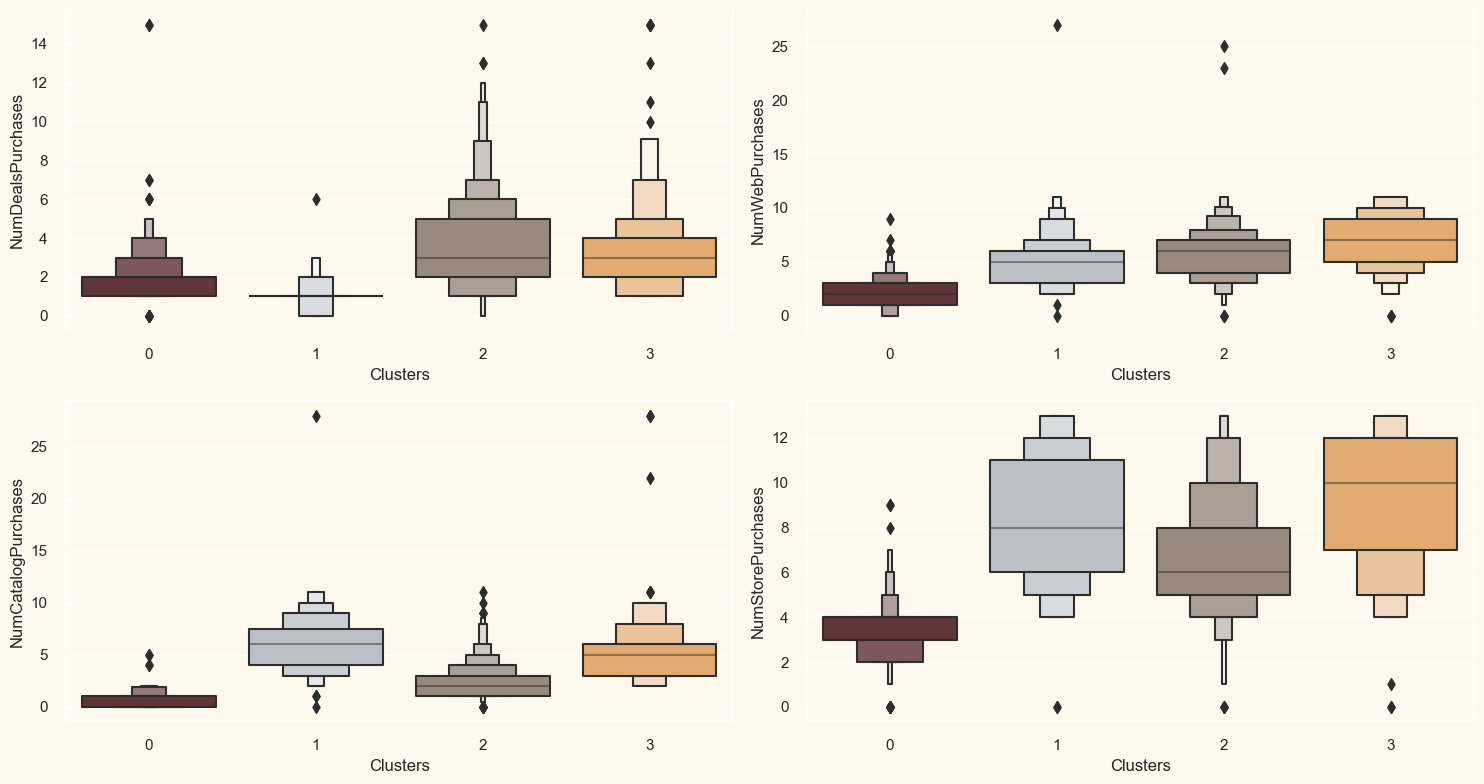

In [74]:
purchase_channel = ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i, channel in enumerate(purchase_channel):
    row, col = divmod(i, 2)
    sns.boxenplot(data=data, x="Clusters", y=channel, ax=ax[row][col], palette=pal)

plt.tight_layout()
plt.show()

1. Deals purchases work well on cluster 0 but cluster 1 seens not accept it.
2. there are some of customers in cluster 0 and 1 be more likely to purchase through the web.
3. Catalog purchase is not suitable for cluster 2 and 3 but it work well on cluster 1.
4. Most of the customers like to purchase in the store.

## Profiling

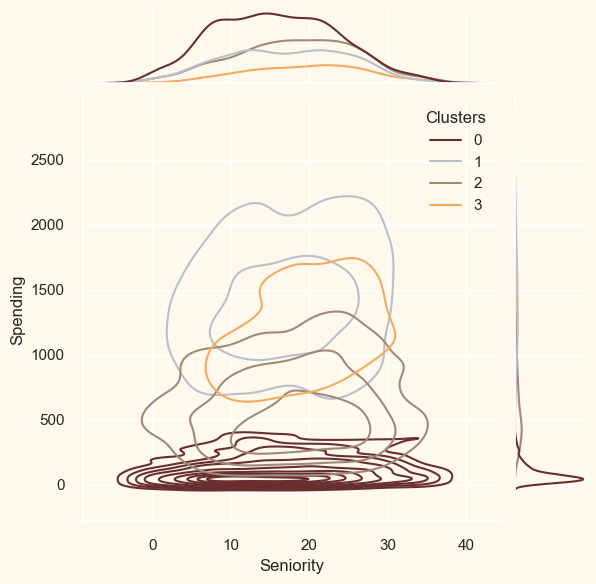

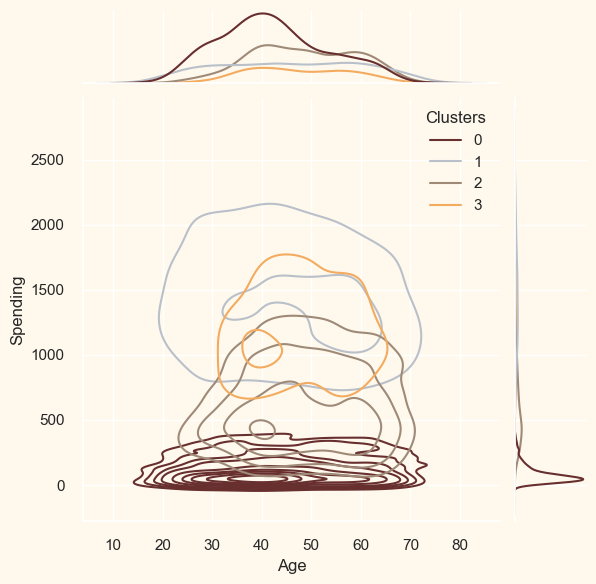

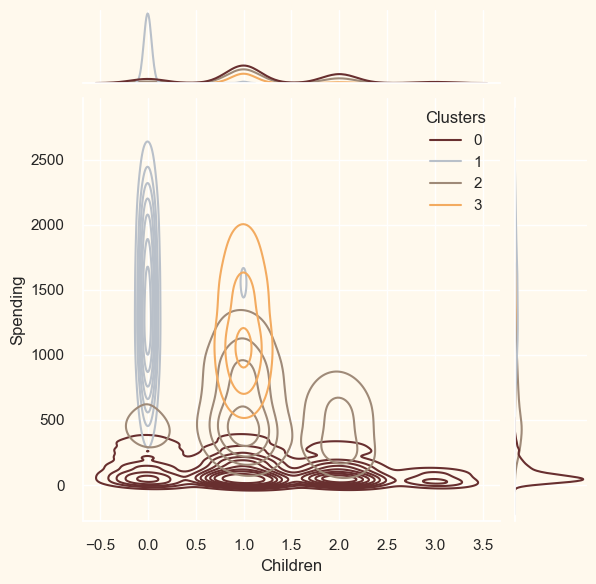

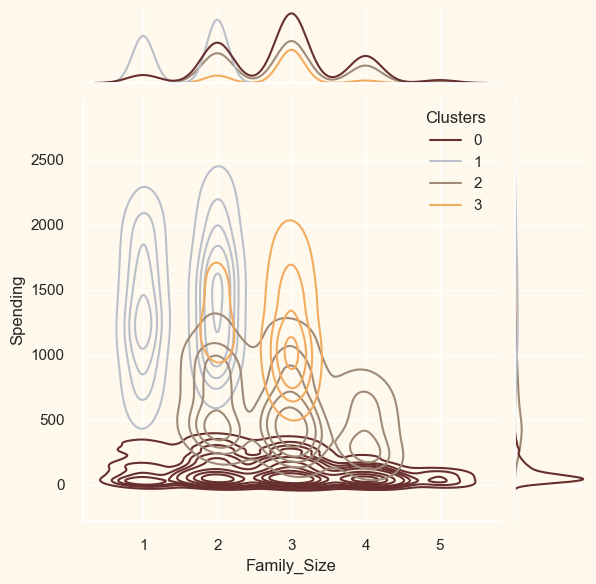

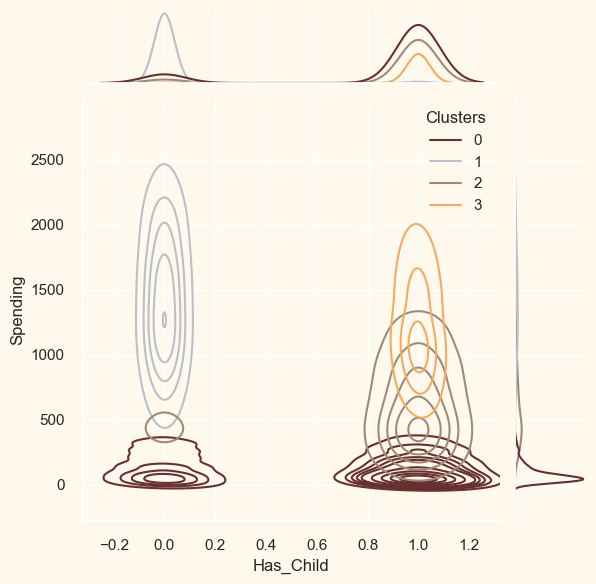

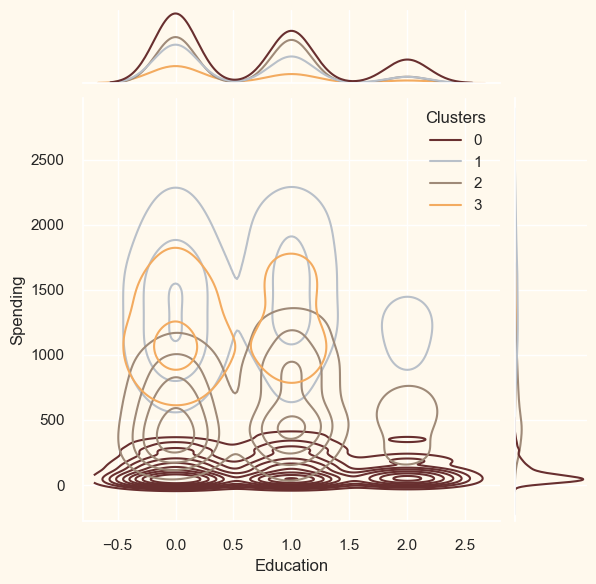

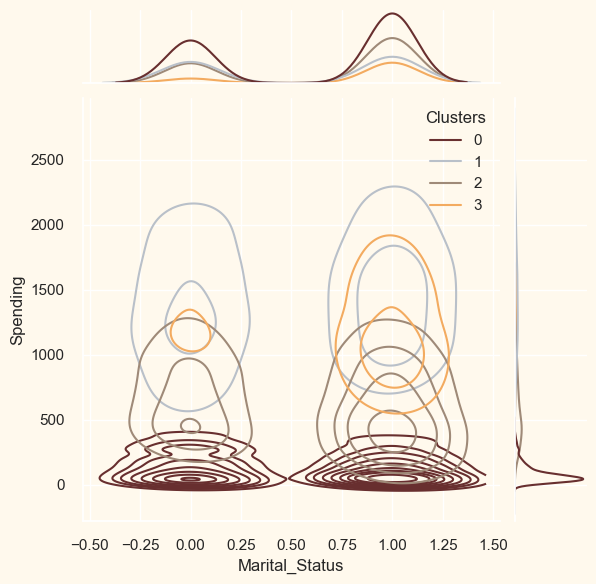

In [75]:
personality = ["Seniority", "Age", "Children", "Family_Size", "Has_Child", "Education", "Marital_Status"]

for i in personality:
    sns.jointplot(data=data, x=i, y="Spending", hue="Clusters", kind="kde", palette=pal)

plt.show()

#### Cluster 0
1. They are difinitely a parent.
2. Most of these people have no children or only one.
3. At the max have 4 members in the family and at least 2.
4. Relatively older.
#### Cluster 1
1. Most of these people don't have children.
2. At the max have 2 members in the family and at least 1.
3. Majority of them are singles than couples.
#### Cluster 2
1. Most of these people have no children or only one.
2. At the max have 3 members in the family and at least 1.
3. Span all ages.
#### Cluster 3
1. They are definitely not a parent.
2. At the max have 5 members in the family and at least 3.
3. Majority of them are couples than singles.